# Importation des librairies

In [220]:
import numpy as np
import pandas as pd
import pyodbc
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import prince
from sklearn.decomposition import PCA
import seaborn as sns
import plotly.offline as pyo
import plotly.graph_objs as go
import dash_table
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, adjusted_rand_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

# German.data

## Data Source

"Jeu de données de crédit allemand" Source: Professeur Dr. Hans Hofmann Institut "fur Statistik und Okonometrie Universit" à Hambourg 
Département d'économie Von-Melle-Park 5 2000 Hambourg 13.
 Nombre d'instances: 1000

#### Importer notre dataset

In [221]:
data=pd.read_csv("german.data",sep="\s+",header=None)

## Data Description

In [222]:
data.shape

(1000, 21)

Notre dataset comporte 1000 clients d'une banque allemande étudiées selon 21 variables

In [223]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [224]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2
999,A12,45,A34,A41,4576,A62,A71,3,A93,A101,...,A123,27,A143,A152,1,A173,1,A191,A201,1


In [225]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
0     1000 non-null object
1     1000 non-null int64
2     1000 non-null object
3     1000 non-null object
4     1000 non-null int64
5     1000 non-null object
6     1000 non-null object
7     1000 non-null int64
8     1000 non-null object
9     1000 non-null object
10    1000 non-null int64
11    1000 non-null object
12    1000 non-null int64
13    1000 non-null object
14    1000 non-null object
15    1000 non-null int64
16    1000 non-null object
17    1000 non-null int64
18    1000 non-null object
19    1000 non-null object
20    1000 non-null int64
dtypes: int64(8), object(13)
memory usage: 164.2+ KB


On a des données qualitatives et des données quntitatives

In [226]:
data.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19, 20],
           dtype='int64')

Notre dataset n'a pas d'entete alors on va l'ajouter avec pandas aprés compréhension des données

In [227]:
data.dtypes

0     object
1      int64
2     object
3     object
4      int64
5     object
6     object
7      int64
8     object
9     object
10     int64
11    object
12     int64
13    object
14    object
15     int64
16    object
17     int64
18    object
19    object
20     int64
dtype: object

Number of Attributes german: 21 (8 numerical, 13 categorical)

In [228]:
data.describe()

,1,4,7,10,12,15,17,20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


D'aprés ce tableau on peut savoir le min , le max, la moyenne, la varience et les 3 quartiles des valeurs numériques de notre dataset pour chaque variable quantitative 

In [229]:
data.mean()-data.median()/data.mean()
#savoir si on a des valeurs abérrants ou non 
# Basé sur la comparaison entre la moyenne et la mediane

1       20.041880
4     3270.548946
7        1.963918
10       1.790518
12      34.617625
15       0.696268
17       0.289199
20       0.530769
dtype: float64

On constate que la colonne 4 contient des valeurs abérrantes

In [230]:
data.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

,1,4,7,10,12,15,17,20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
10%,9.000000,932.000000,1.000000,1.000000,23.000000,1.000000,1.000000,1.000000
20%,12.000000,1262.000000,2.000000,2.000000,26.000000,1.000000,1.000000,1.000000
30%,12.000000,1479.400000,2.000000,2.000000,28.000000,1.000000,1.000000,1.000000
40%,15.000000,1906.800000,3.000000,2.000000,30.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
60%,24.000000,2852.400000,4.000000,4.000000,36.000000,1.000000,1.000000,1.000000


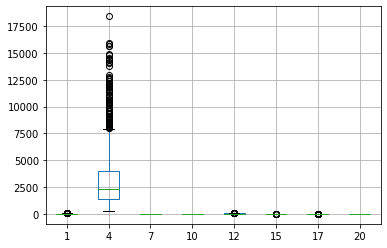

In [231]:
data.boxplot();
#Une boite à moustache: est une méthode pour représenter graphiquement des groupes de données numériques
#à travers leurs quartiles. 

On a bien des valeurs abérrantes por la colonne 4

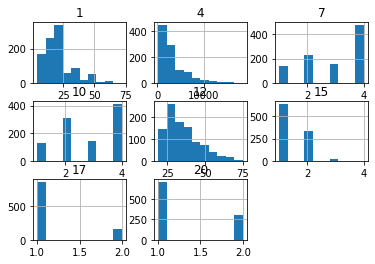

In [232]:
data.hist();
#Un histogramme: est une autre façon d'afficher la distribution d'une variable quantitative.
#Ils sont particulièrement utiles pour les grands ensembles de données et divise les valeurs variables 
#en intervalles de taille égale.Nous pouvons voir le nombre d'individus dans chaque intervalle.

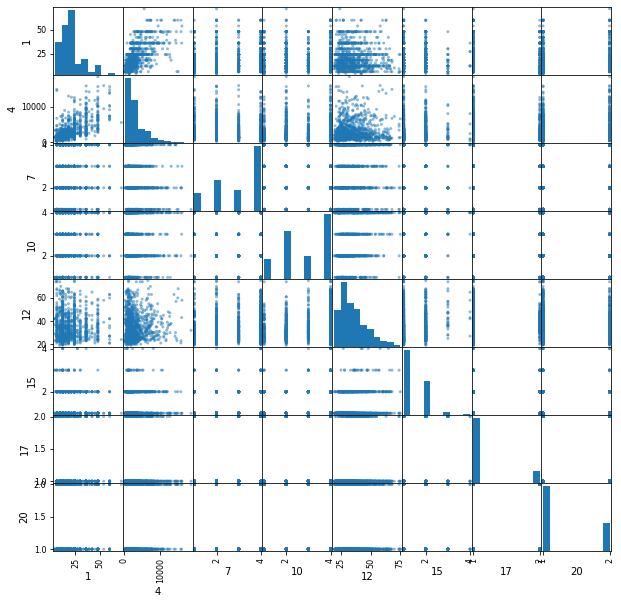

In [233]:
pd.plotting.scatter_matrix(data,figsize=(10,10));

In [234]:
data.corr()
# Une matrice de corrélation; est un tableau montrant les coefficients de corrélation entre les variables.
#Chaque cellule du tableau montre la corrélation entre deux variables. 
# deux variables sont fortement corrilées si le coeff de corrélation tend vers 1, 
#si le coeff de corrélation tend vers 0 les deux variables ne sont pas corrilées

,1,4,7,10,12,15,17,20
1,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.214927
4,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.154739
7,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,0.072404
10,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,0.002967
12,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.091127
15,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.045732
17,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,-0.003015
20,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,1.000000


Pour les variables quantitatives on n'a pas de variables qui sont fortement corrilés (on n'a pas des coeff de correlation > 0.8)

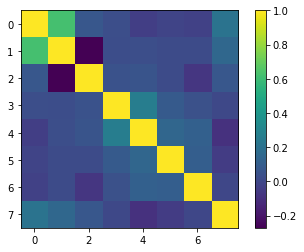

In [235]:
plt.imshow(data.corr())
plt.colorbar();
# variables fortement corrilées couleur jaune, variables non corrilées couleur bleu

In [236]:
# décrire la liste des variables (quali)
data.describe(include=['object'])

,0,2,3,5,6,8,9,11,13,14,16,18,19
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2
top,A14,A32,A43,A61,A73,A93,A101,A123,A143,A152,A173,A191,A201
freq,394,530,280,603,339,548,907,332,814,713,630,596,963


On a des variables qualitatives qui ont 2 modalités (donc on va utiliser ultérieurement LabelEncoder pour l'encodage) et des variables qualitatives qui ont 3 modalités ou plus (utiliser OneHotEncoder pour l'encodage)

# Data Understanding

In [237]:
data.loc[:,0].unique()

array(['A11', 'A12', 'A14', 'A13'], dtype=object)

Status of existing checking account(Statut du compte courant existant)
               A11 :      ... <    0 DM(Deutsche Mark)
	       A12 : 0 <= ... <  200 DM
	       A13 :      ... >= 200 DM /
		     salary assignments for at least 1 year(affectations salariales pendant au moins 1 an)
               A14 : no checking account(pas de compte courant)


In [238]:
data.loc[:,1].unique()

array([ 6, 48, 12, 42, 24, 36, 30, 15,  9, 10,  7, 60, 18, 45, 11, 27,  8,
       54, 20, 14, 33, 21, 16,  4, 47, 13, 22, 39, 28,  5, 26, 72, 40],
      dtype=int64)

 Durée en mois

In [239]:
data.loc[:,2].unique()

array(['A34', 'A32', 'A33', 'A30', 'A31'], dtype=object)

Credit history(Histoire de credit)
	      A30 : no credits taken(aucun crédit pris)/
		    all credits paid back duly(tous les crédits dûment remboursés)
              A31 : all credits at this bank paid back duly(
tous les crédits de cette banque ont été remboursés)
	      A32 : existing credits paid back duly till now(crédits déjà remboursés jusqu'à maintenant)
              A33 : delay in paying off in the past(retard dans le paiement dans le passé)
	      A34 : critical account(compte critique)/
		    other credits existing (not at this bank)(autres crédits existants (pas dans cette banque))


In [240]:
data.loc[:,3].unique()

array(['A43', 'A46', 'A42', 'A40', 'A41', 'A49', 'A44', 'A45', 'A410',
       'A48'], dtype=object)

      Purpose
	      A40 : car (new)
	      A41 : car (used)
	      A42 : furniture/equipment
	      A43 : radio/television
	      A44 : domestic appliances
	      A45 : repairs
	      A46 : education
	      A47 : (vacation - does not exist?)
	      A48 : retraining
	      A49 : business
	      A410 : others


In [241]:
data.loc[:,4].unique();

Credit amount

In [242]:
data.loc[:,5].unique()

array(['A65', 'A61', 'A63', 'A64', 'A62'], dtype=object)

Savings account/bonds
	      A61 :          ... <  100 DM
	      A62 :   100 <= ... <  500 DM
	      A63 :   500 <= ... < 1000 DM
	      A64 :          .. >= 1000 DM
              A65 :   unknown/ no savings account


In [243]:
data.loc[:,6].unique()

array(['A75', 'A73', 'A74', 'A71', 'A72'], dtype=object)

      Present employment since
	      A71 : unemployed
	      A72 :       ... < 1 year
	      A73 : 1  <= ... < 4 years  
	      A74 : 4  <= ... < 7 years
	      A75 :       .. >= 7 years


In [244]:
data.loc[:,7].unique()

array([4, 2, 3, 1], dtype=int64)

      Installment rate in percentage of disposable income

In [245]:
data.loc[:,8].unique()

array(['A93', 'A92', 'A91', 'A94'], dtype=object)

      Personal status and sex
	      A91 : male   : divorced/separated
	      A92 : female : divorced/separated/married
          A93 : male   : single
	      A94 : male   : married/widowed
	      A95 : female : single


In [246]:
data.loc[:,9].unique()

array(['A101', 'A103', 'A102'], dtype=object)

Other debtors / guarantors
	      A101 : none
	      A102 : co-applicant
	      A103 : guarantor



In [247]:
data.loc[:,10].unique()

array([4, 2, 3, 1], dtype=int64)

Present residence since(Résidence actuelle depuis)

In [248]:
data.loc[:,11].unique()

array(['A121', 'A122', 'A124', 'A123'], dtype=object)

Property(Propriété)
	      A121 : real estate(immobilier)
	      A122 : if not A121 : building society savings agreement(accord d'épargne pour la société de construction)/
				   life insurance
              A123 : if not A121/A122 : car or other, not in attribute 6
	      A124 : unknown / no property


In [249]:
data.loc[:,12].unique()

array([67, 22, 49, 45, 53, 35, 61, 28, 25, 24, 60, 32, 44, 31, 48, 26, 36,
       39, 42, 34, 63, 27, 30, 57, 33, 37, 58, 23, 29, 52, 50, 46, 51, 41,
       40, 66, 47, 56, 54, 20, 21, 38, 70, 65, 74, 68, 43, 55, 64, 75, 19,
       62, 59], dtype=int64)

Age in years

In [250]:
data.loc[:,13].unique()

array(['A143', 'A141', 'A142'], dtype=object)

      Other installment plans (Autres plans de versement)
	      A141 : bank
	      A142 : stores
	      A143 : none


In [251]:
data.loc[:,14].unique()

array(['A152', 'A153', 'A151'], dtype=object)

      Housing
	      A151 : rent
	      A152 : own
	      A153 : for free


In [252]:
data.loc[:,15].unique()

array([2, 1, 3, 4], dtype=int64)

Number of existing credits at this bank(Nombre de crédits existants dans cette banque)

In [253]:
data.loc[:,16].unique()

array(['A173', 'A172', 'A174', 'A171'], dtype=object)

      Job
	      A171 : unemployed/ unskilled  - non-resident
	      A172 : unskilled - resident
	      A173 : skilled employee / official
	      A174 : management/ self-employed/
		     highly qualified employee/ officer


In [254]:
data.loc[:,17].unique()

array([1, 2], dtype=int64)

Number of people being liable to provide maintenance for

In [255]:
data.loc[:,18].unique()

array(['A192', 'A191'], dtype=object)

      Telephone
	      A191 : none
	      A192 : yes, registered under the customers name


In [256]:
data.loc[:,19].unique()

array(['A201', 'A202'], dtype=object)

foreign worker
	      A201 : yes
	      A202 : no



In [257]:
data.loc[:,20].unique()

array([1, 2], dtype=int64)

1 = Good,  2 = Bad,
Notre cible (class a customer as good or as bad)

# Masking

In [258]:
#select * from data where Statut du compte courant existant < 0 DM(Deutsche Mark) 
data[data[0]=="A11"];

In [259]:
data[data[0]=="A11"].shape

(274, 21)

il ya 274 parmi 1000 qui ont un Statut du compte courant existant < 0 DM(Deutsche Mark)

In [260]:
data[data[0]=="A13"].shape

(63, 21)

il ya 63 parmi 1000 qui ont un Statut du compte courant existant > 200 DM(Deutsche Mark)

In [261]:
data[data[0]=="A14"].shape

(394, 21)

il ya 394 parmi 1000 qui n'ont pas de compte courant

In [262]:
data[data[2]=="A34"].shape

(293, 21)

Il ya 293 parmi 1000 qui ont des comptes critiques(autres crédits existants (pas dans cette banque))

In [263]:
data[data[8]=="A95"].shape

(0, 21)

Il n'y a plus de femal single parmi les 1000 clients 

In [264]:
data[data[8]=="A93"].shape

(548, 21)

On a 548 male single parmi les 1000 clients

In [265]:
data[data[15]==4].shape

(6, 21)

Il ya 6 parmi 1000 qui ont 4 crédits existants dans cette banque

# Features Engeneering

In [266]:
data.isna();

In [267]:
data.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
dtype: int64

#### On n'a pas des valeurs manquantes dans notre dataset

## Encodage des variable qualitatives

In [268]:
data_num=data.drop(columns=[0,2,3,5,6,8,9,11,13,14,16,18,19])

In [269]:
data_num.shape

(1000, 8)

In [270]:
#Pour s'assurer qu'on n'a plus de variables qualitatives
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
1     1000 non-null int64
4     1000 non-null int64
7     1000 non-null int64
10    1000 non-null int64
12    1000 non-null int64
15    1000 non-null int64
17    1000 non-null int64
20    1000 non-null int64
dtypes: int64(8)
memory usage: 62.6 KB


### Encoder les variables qualitatives

Encodage des variables ayant 2 modalités

In [271]:
data[18];

In [272]:
data.loc[:,18].unique()

array(['A192', 'A191'], dtype=object)

In [273]:
data[19];

In [274]:
data.loc[:,19].unique()

array(['A201', 'A202'], dtype=object)

In [275]:
from sklearn.preprocessing import LabelEncoder

In [276]:
labelencoder=LabelEncoder()

In [277]:
l=labelencoder.fit_transform(data[18].values)

In [278]:
l

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,

#### On a affecté 1 à A192 et 0 à A191 (colonne telephone: 1 => yes; 0 => no)

In [279]:
data_num=pd.concat([data_num,pd.DataFrame(l)],axis=1)

In [280]:
data_num;

In [281]:
l1=labelencoder.fit_transform(data[19].values)

In [282]:
l1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

#### 0 remplace A201 et 1 remplace A202 (colonne foreign worker 0 => yes; 1 => no)

In [283]:
data_num=pd.concat([data_num,pd.DataFrame(l1)],axis=1)

In [284]:
data_num;

## Affecter une antete à notre dataset

In [285]:
data_num.columns = ['Durée en mois', 'Montant du crédit', 'Taux de versement', 'Résidence actuelle depuis', 'Age','Nbr crédits existants','Nbr personnes assurer entretien','Classe de client','Telephone','Travailleur étranger']

In [286]:
data_num.head()

,Durée en mois,Montant du crédit,Taux de versement,Résidence actuelle depuis,Age,Nbr crédits existants,Nbr personnes assurer entretien,Classe de client,Telephone,Travailleur étranger
0,6,1169,4,4,67,2,1,1,1,0
1,48,5951,2,2,22,1,1,2,0,0
2,12,2096,2,3,49,1,2,1,0,0
3,42,7882,2,4,45,1,2,1,0,0
4,24,4870,3,4,53,2,2,2,0,0


### Encodage des variables ayant 3 modalités ou plus

In [287]:
from sklearn.preprocessing import OneHotEncoder

In [288]:
onehotencoder=OneHotEncoder()

In [289]:
matrix=onehotencoder.fit_transform(data[0].values.reshape(-1,1)).toarray()

In [290]:
matrix

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [291]:
mat=pd.DataFrame(matrix, columns=("StatutCompte<0","StatutCompte0>..>200","StatutCompte>200","StatutComptePasDeCompte"))

In [292]:
data_num=pd.concat([data_num,mat],axis=1)

In [293]:
data_num;

In [294]:
matrix2=onehotencoder.fit_transform(data[2].values.reshape(-1,1)).toarray()

In [295]:
matrix2

array([[0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [296]:
mat2=pd.DataFrame(matrix2, columns=("aucun crédit pris","tous les crédits remboursés","crédits déjà remboursés","retard dans le paiement","compte critique"))

In [297]:
data_num=pd.concat([data_num,mat2],axis=1)

In [298]:
data_num;

In [299]:
matrix3=onehotencoder.fit_transform(data[3].values.reshape(-1,1)).toarray()

In [300]:
matrix3

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [301]:
mat3=pd.DataFrame(matrix3, columns=("Objectif:nouvelleVoiture","Objectif:VoitureOccasion","Objectif:mobilier/équipement","Objectif:radio/television","Objectif:électroménagers","Objectif:réparations","Objectif:education","Objectif:reconversion","Objectif:affaires","Objectif:autres"))

In [302]:
data_num=pd.concat([data_num,mat3],axis=1)

In [303]:
data_num;

In [304]:
matrix5=onehotencoder.fit_transform(data[5].values.reshape(-1,1)).toarray()

In [305]:
matrix5

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [306]:
mat5=pd.DataFrame(matrix5, columns=("CompteD'Epargne <100DM","CompteD'Epargne 100<=..<500DM","CompteD'Epargne 500<=..<1000DM","CompteD'Epargne >=1000DM","CompteD'Epargne inexistant"))

In [307]:
data_num=pd.concat([data_num,mat5],axis=1)

In [308]:
data_num;

In [309]:
matrix6=onehotencoder.fit_transform(data[6].values.reshape(-1,1)).toarray()

In [310]:
matrix6

array([[0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [311]:
mat6=pd.DataFrame(matrix6, columns=("sans emploi","EmploiDepuis <1an","EmploiDepuis 1<=..<4ans","EmploiDepuis 4<=..<7ans","EmploiDepuis >7ans"))

In [312]:
data_num=pd.concat([data_num,mat6],axis=1)

In [313]:
data_num;

In [314]:
matrix8=onehotencoder.fit_transform(data[8].values.reshape(-1,1)).toarray()

In [315]:
matrix8

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

In [316]:
mat8=pd.DataFrame(matrix8, columns=("homme divorcé","femme divorcée/mariée","homme célibataire","homme marié/veuf"))

In [317]:
data_num=pd.concat([data_num,mat8],axis=1)

In [318]:
data_num;

In [319]:
matrix9=onehotencoder.fit_transform(data[9].values.reshape(-1,1)).toarray()

In [320]:
matrix9

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [321]:
mat9=pd.DataFrame(matrix9, columns=("Autres débiteurs:aucun","Autres débiteurs:codemandeur","Autres débiteurs:garant"))

In [322]:
data_num=pd.concat([data_num,mat9],axis=1)

In [323]:
data_num;

In [324]:
matrix11=onehotencoder.fit_transform(data[11].values.reshape(-1,1)).toarray()

In [325]:
matrix11

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [326]:
mat11=pd.DataFrame(matrix11, columns=("Propriété immobilier","Propriété assurance-vie","Propriété voiture ou autre","pas de propriété"))

In [327]:
data_num=pd.concat([data_num,mat11],axis=1)

In [328]:
data_num;

In [329]:
matrix13=onehotencoder.fit_transform(data[13].values.reshape(-1,1)).toarray()

In [330]:
matrix13

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [331]:
mat13=pd.DataFrame(matrix13, columns=("Autres plans de versement:banque","Autres plans de versement:magasins","Aucun Autres plans de versement"))

In [332]:
data_num=pd.concat([data_num,mat13],axis=1)

In [333]:
data_num;

In [334]:
matrix14=onehotencoder.fit_transform(data[14].values.reshape(-1,1)).toarray()

In [335]:
matrix14

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [336]:
mat14=pd.DataFrame(matrix14, columns=("Logement:location","Logement: propriétaire","Logement:gratuitement"))

In [337]:
data_num=pd.concat([data_num,mat14],axis=1)

In [338]:
data_num;

In [339]:
matrix16=onehotencoder.fit_transform(data[16].values.reshape(-1,1)).toarray()

In [340]:
matrix16

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

In [341]:
mat16=pd.DataFrame(matrix16, columns=("sans emploi/non-resident","emploi:non qualifié/resident","emploi:fonctionnaire qualifié","emploi: indépendant/officier/hautement qualifié"))

In [342]:
data_num=pd.concat([data_num,mat16],axis=1)

In [343]:
data_num

,Durée en mois,Montant du crédit,Taux de versement,Résidence actuelle depuis,Age,Nbr crédits existants,Nbr personnes assurer entretien,Classe de client,Telephone,Travailleur étranger,...,Autres plans de versement:banque,Autres plans de versement:magasins,Aucun Autres plans de versement,Logement:location,Logement: propriétaire,Logement:gratuitement,sans emploi/non-resident,emploi:non qualifié/resident,emploi:fonctionnaire qualifié,emploi: indépendant/officier/hautement qualifié
0,6,1169,4,4,67,2,1,1,1,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,48,5951,2,2,22,1,1,2,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,12,2096,2,3,49,1,2,1,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,42,7882,2,4,45,1,2,1,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,24,4870,3,4,53,2,2,2,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,1,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
996,30,3857,4,4,40,1,1,1,1,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
997,12,804,4,4,38,1,1,1,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
998,45,1845,4,4,23,1,1,2,1,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [344]:
data_num.shape

(1000, 60)

In [345]:
data_num.to_csv('German_num.csv')

# Feature Selection / Dimension Reduction

In [346]:
data = pd.read_csv('German_num.csv',index_col=0)

In [347]:
data.shape

(1000, 60)

In [348]:
data.columns

Index(['Durée en mois', 'Montant du crédit', 'Taux de versement',
       'Résidence actuelle depuis', 'Age', 'Nbr crédits existants',
       'Nbr personnes assurer entretien', 'Classe de client', 'Telephone',
       'Travailleur étranger', 'StatutCompte<0', 'StatutCompte0>..>200',
       'StatutCompte>200', 'StatutComptePasDeCompte', 'aucun crédit pris',
       'tous les crédits remboursés', 'crédits déjà remboursés',
       'retard dans le paiement', 'compte critique',
       'Objectif:nouvelleVoiture', 'Objectif:VoitureOccasion',
       'Objectif:mobilier/équipement', 'Objectif:radio/television',
       'Objectif:électroménagers', 'Objectif:réparations',
       'Objectif:education', 'Objectif:reconversion', 'Objectif:affaires',
       'Objectif:autres', 'CompteD'Epargne <100DM',
       'CompteD'Epargne 100<=..<500DM', 'CompteD'Epargne 500<=..<1000DM',
       'CompteD'Epargne >=1000DM', 'CompteD'Epargne inexistant', 'sans emploi',
       'EmploiDepuis <1an', 'EmploiDepuis 1<=..<4ans',

In [349]:
data.head()

,Durée en mois,Montant du crédit,Taux de versement,Résidence actuelle depuis,Age,Nbr crédits existants,Nbr personnes assurer entretien,Classe de client,Telephone,Travailleur étranger,...,Autres plans de versement:banque,Autres plans de versement:magasins,Aucun Autres plans de versement,Logement:location,Logement: propriétaire,Logement:gratuitement,sans emploi/non-resident,emploi:non qualifié/resident,emploi:fonctionnaire qualifié,emploi: indépendant/officier/hautement qualifié
0,6,1169,4,4,67,2,1,1,1,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,48,5951,2,2,22,1,1,2,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,12,2096,2,3,49,1,2,1,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,42,7882,2,4,45,1,2,1,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,24,4870,3,4,53,2,2,2,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [350]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 60 columns):
Durée en mois                                      1000 non-null int64
Montant du crédit                                  1000 non-null int64
Taux de versement                                  1000 non-null int64
Résidence actuelle depuis                          1000 non-null int64
Age                                                1000 non-null int64
Nbr crédits existants                              1000 non-null int64
Nbr personnes assurer entretien                    1000 non-null int64
Classe de client                                   1000 non-null int64
Telephone                                          1000 non-null int64
Travailleur étranger                               1000 non-null int64
StatutCompte<0                                     1000 non-null float64
StatutCompte0>..>200                               1000 non-null float64
StatutCompte>200                      

In [351]:
data.corr()

,Durée en mois,Montant du crédit,Taux de versement,Résidence actuelle depuis,Age,Nbr crédits existants,Nbr personnes assurer entretien,Classe de client,Telephone,Travailleur étranger,...,Autres plans de versement:banque,Autres plans de versement:magasins,Aucun Autres plans de versement,Logement:location,Logement: propriétaire,Logement:gratuitement,sans emploi/non-resident,emploi:non qualifié/resident,emploi:fonctionnaire qualifié,emploi: indépendant/officier/hautement qualifié
Durée en mois,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.214927,0.164718,-0.138196,...,0.035851,0.065688,-0.067602,-0.064417,-0.075169,0.189117,-0.044043,-1.812030e-01,0.055010,0.147515
Montant du crédit,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.154739,0.276995,-0.050050,...,0.039474,0.024262,-0.048292,-0.024611,-0.117497,0.201643,-0.027969,-1.617570e-01,-0.092636,0.319715
Taux de versement,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,0.072404,0.014413,-0.090024,...,-0.016150,0.056071,-0.016139,-0.091373,0.049922,0.040098,-0.087834,-5.723714e-02,0.042623,0.042805
Résidence actuelle depuis,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,0.002967,0.095359,-0.054097,...,0.014530,-0.054460,0.016704,0.167285,-0.297547,0.227044,-0.034545,9.064820e-03,-0.000657,0.004952
Age,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.091127,0.145259,-0.006151,...,0.046552,-0.011080,-0.035362,-0.212620,0.006553,0.253058,0.059954,4.371237e-02,-0.148283,0.127605
Nbr crédits existants,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.045732,0.065553,-0.009717,...,0.042190,0.023496,-0.050290,-0.058070,0.041386,0.011406,0.059582,-1.039203e-02,-0.001471,-0.010906
Nbr personnes assurer entretien,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,-0.003015,-0.014753,0.077071,...,0.075519,0.009335,-0.072220,-0.063033,-0.027579,0.118047,-0.007723,1.450658e-01,-0.106737,-0.015096
Classe de client,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,1.000000,-0.036466,-0.082079,...,0.096510,0.050523,-0.113285,0.092785,-0.134589,0.081556,0.005951,-2.182179e-02,-0.013559,0.040559
Telephone,0.164718,0.276995,0.014413,0.095359,0.145259,0.065553,-0.014753,-0.036466,1.000000,-0.107401,...,0.010863,0.029003,-0.025433,-0.049524,-0.036275,0.114036,-0.040124,-2.537205e-01,-0.061289,0.385706
Travailleur étranger,-0.138196,-0.050050,-0.090024,-0.054097,-0.006151,-0.009717,0.077071,-0.082079,-0.107401,1.000000,...,-0.002190,-0.043530,0.025623,0.032849,0.018960,-0.068205,0.042834,8.741177e-02,-0.047292,-0.051858


Le plus grand coefficient de correlation= 0,77 entre pas de propriété et logement gratuit

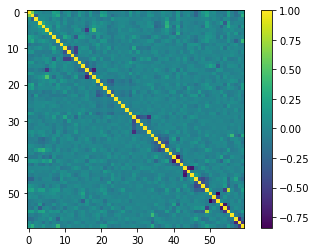

In [352]:
plt.imshow(data.corr())
plt.colorbar();

On n'a pas des variables fortement corrilées (coeff de corrélation >0.8) dans notre dataset , donc à ce niveau on ne peut pas supprimer aucune variable

### Encodage + Rescaling

In [353]:
ss = StandardScaler()
data_toEncode = data.drop(columns=['Classe de client']).select_dtypes(include=['int64', 'float64'])
ssr = ss.fit_transform(data_toEncode)
data_final = pd.concat([pd.DataFrame(ssr,columns=data_toEncode.columns),data['Classe de client']],axis=1)

In [354]:
X = data_final.drop('Classe de client', axis=1)
y = data_final['Classe de client']

## ACP
#### Analyse par Composante Principale
Objectif: Déterminer les axes principales qui resument le maximum d’information de notre dataset

In [355]:
# Calcul des composantes principales
# Le nombre de composantes (K) n’étant pas spécifié, il est par défaut égal au nombre de variables (K = p)
pca = PCA()
coord = pca.fit_transform(X)
coord

array([[ 1.08269885e+00, -3.19900297e+00,  1.41750791e+00, ...,
         5.90620041e-16, -6.33711036e-16, -7.34214893e-16],
       [-2.04708544e+00,  1.18230551e+00, -1.46087483e+00, ...,
        -6.24543838e-17, -7.60556048e-16,  1.11190297e-16],
       [ 4.39393934e-02, -2.31839873e+00,  2.30677516e+00, ...,
        -6.44634537e-17, -4.63452427e-16,  1.42371632e-15],
       ...,
       [-4.99695951e-01, -1.74075372e+00, -7.62256273e-01, ...,
         3.07352057e-17,  1.44891422e-16,  1.81116958e-16],
       [ 1.84770858e+00,  2.17543342e+00, -3.44760029e-01, ...,
         2.79228444e-16, -1.23810854e-16,  2.79036014e-16],
       [ 1.71876464e+00, -2.89742542e-01, -2.10046461e+00, ...,
         8.35782447e-17, -3.72114905e-16, -3.86778983e-16]])

In [356]:
pca.n_components_

59

In [357]:
pca.explained_variance_

array([3.89844409e+00, 2.89853167e+00, 2.60719207e+00, 2.43888477e+00,
       2.09785931e+00, 2.02245810e+00, 1.97923152e+00, 1.85503137e+00,
       1.77308309e+00, 1.72015263e+00, 1.54771885e+00, 1.50262271e+00,
       1.45970064e+00, 1.37441302e+00, 1.32355865e+00, 1.28138449e+00,
       1.24333061e+00, 1.22454195e+00, 1.20198851e+00, 1.16023106e+00,
       1.13821991e+00, 1.12953508e+00, 1.11301858e+00, 1.06985974e+00,
       1.03596304e+00, 1.02575441e+00, 1.01900801e+00, 1.00544989e+00,
       9.66549032e-01, 9.48564130e-01, 9.38740295e-01, 9.22924565e-01,
       8.95213913e-01, 8.41996900e-01, 8.10054698e-01, 8.00739265e-01,
       7.66681554e-01, 7.55615440e-01, 7.30356196e-01, 7.12120878e-01,
       6.86154102e-01, 6.43253586e-01, 5.72513245e-01, 5.38482385e-01,
       4.63791956e-01, 4.26642445e-01, 2.56695719e-01, 2.34800958e-01,
       7.68832534e-31, 3.80815021e-31, 3.00585408e-31, 2.41393555e-31,
       1.91689531e-31, 1.90669854e-31, 1.28972782e-31, 1.24290746e-31,
      

In [358]:
pca.explained_variance_ratio_

array([6.60092483e-02, 4.90785278e-02, 4.41455065e-02, 4.12956929e-02,
       3.55213806e-02, 3.42446719e-02, 3.35127507e-02, 3.14097684e-02,
       3.00222036e-02, 2.91259742e-02, 2.62062904e-02, 2.54427133e-02,
       2.47159482e-02, 2.32718408e-02, 2.24107643e-02, 2.16966629e-02,
       2.10523268e-02, 2.07341934e-02, 2.03523139e-02, 1.96452683e-02,
       1.92725711e-02, 1.91255177e-02, 1.88458570e-02, 1.81150828e-02,
       1.75411369e-02, 1.73682822e-02, 1.72540509e-02, 1.70244820e-02,
       1.63658048e-02, 1.60612808e-02, 1.58949416e-02, 1.56271465e-02,
       1.51579440e-02, 1.42568628e-02, 1.37160109e-02, 1.35582801e-02,
       1.29816080e-02, 1.27942343e-02, 1.23665397e-02, 1.20577755e-02,
       1.16181008e-02, 1.08917005e-02, 9.69391070e-03, 9.11769327e-03,
       7.85301974e-03, 7.22399665e-03, 4.34642413e-03, 3.97569757e-03,
       1.30180288e-32, 6.44803739e-33, 5.08957327e-33, 4.08732478e-33,
       3.24572613e-33, 3.22846074e-33, 2.18379337e-33, 2.10451620e-33,
      

In [359]:
#nombre d'observations
n = X.shape[0]
#nombre de variables
p = X.shape[1]
eigval = (n-1)/n*pca.explained_variance_
eigval

array([3.89454565e+00, 2.89563314e+00, 2.60458488e+00, 2.43644588e+00,
       2.09576146e+00, 2.02043564e+00, 1.97725229e+00, 1.85317633e+00,
       1.77131001e+00, 1.71843248e+00, 1.54617114e+00, 1.50112009e+00,
       1.45824094e+00, 1.37303861e+00, 1.32223510e+00, 1.28010311e+00,
       1.24208728e+00, 1.22331741e+00, 1.20078652e+00, 1.15907083e+00,
       1.13708169e+00, 1.12840554e+00, 1.11190556e+00, 1.06878988e+00,
       1.03492708e+00, 1.02472865e+00, 1.01798900e+00, 1.00444444e+00,
       9.65582483e-01, 9.47615565e-01, 9.37801555e-01, 9.22001641e-01,
       8.94318699e-01, 8.41154903e-01, 8.09244643e-01, 7.99938526e-01,
       7.65914872e-01, 7.54859824e-01, 7.29625840e-01, 7.11408757e-01,
       6.85467947e-01, 6.42610332e-01, 5.71940731e-01, 5.37943903e-01,
       4.63328164e-01, 4.26215802e-01, 2.56439024e-01, 2.34566157e-01,
       7.68063701e-31, 3.80434206e-31, 3.00284823e-31, 2.41152162e-31,
       1.91497842e-31, 1.90479184e-31, 1.28843809e-31, 1.24166456e-31,
      

Si on va tenir compte du critére de kaiser (valeurs propres >= 1) on peut prendre 28 dimensions


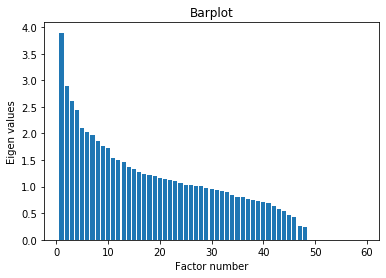

In [360]:
# barplot des valeurs propres
plt.bar(np.arange(1,p+1),eigval);
plt.title("Barplot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

Celon le critére de coude on peut prendre 2 axes

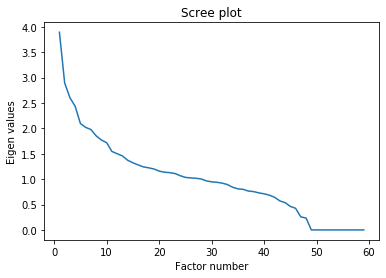

In [361]:
#scree plot
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

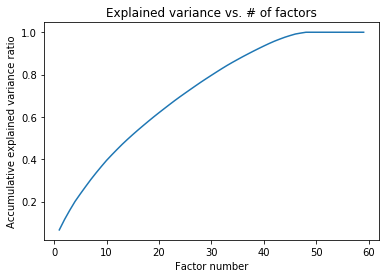

In [362]:
#cumul de variance expliquée
plt.plot(np.arange(1,p+1),np.cumsum(pca.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Accumulative explained variance ratio")
plt.xlabel("Factor number")
plt.show()

In [363]:
np.cumsum(pca.explained_variance_ratio_)

array([0.06600925, 0.11508778, 0.15923328, 0.20052898, 0.23605036,
       0.27029503, 0.30380778, 0.33521755, 0.36523975, 0.39436572,
       0.42057202, 0.44601473, 0.47073068, 0.49400252, 0.51641328,
       0.53810994, 0.55916227, 0.57989646, 0.60024878, 0.61989405,
       0.63916662, 0.65829214, 0.67713799, 0.69525308, 0.71279421,
       0.73016249, 0.74741655, 0.76444103, 0.78080683, 0.79686811,
       0.81276305, 0.8283902 , 0.84354815, 0.85780501, 0.87152102,
       0.8850793 , 0.89806091, 0.91085514, 0.92322168, 0.93527946,
       0.94689756, 0.95778926, 0.96748317, 0.97660086, 0.98445388,
       0.99167788, 0.9960243 , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        ])

- 28 dimensions résument plus de 76% de l'information totale de notre dataset.
- 47 dimensions résument plus de 99% de l'information totale de notre dataset.

### Analyse des individus

In [364]:
#contribution des individus dans l'inertie totale
di = np.sum(X**2,axis=1)
#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(p-1):
    cos2[:,j] = cos2[:,j]/di
#contributions aux axes
ctr = coord**2
for j in range(p-1):
    ctr[:,j] = ctr[:,j]/(n*eigval[j])

pd.DataFrame({'Inertie':di,'COS2_D1':cos2[:,0],'COS2_D2':cos2[:,1], 'COS2_D3':cos2[:,2], 'COS2_D4':cos2[:,3],
              'Contrib_D1':ctr[:,0],'Contrib_D2':ctr[:,1],'Contrib_D3':ctr[:,2],'Contrib_D4':ctr[:,3]})

,Inertie,COS2_D1,COS2_D2,COS2_D3,COS2_D4,Contrib_D1,Contrib_D2,Contrib_D3,Contrib_D4
0,42.858716,0.027351,0.238776,0.046883,0.105821,3.009945e-04,0.003534,0.000771,0.001861
1,32.270159,0.129859,0.043317,0.066134,0.036900,1.076007e-03,0.000483,0.000819,0.000489
2,55.058208,0.000035,0.097623,0.096647,0.015190,4.957370e-07,0.001856,0.002043,0.000343
3,78.978238,0.017875,0.098163,0.064571,0.000172,3.624893e-04,0.002677,0.001958,0.000006
4,55.647137,0.198276,0.011030,0.053183,0.041595,2.833058e-03,0.000212,0.001136,0.000950
...,...,...,...,...,...,...,...,...,...
995,34.273242,0.158775,0.001356,0.008648,0.022671,1.397268e-03,0.000016,0.000114,0.000319
996,58.111972,0.010144,0.035803,0.012544,0.000940,1.513606e-04,0.000719,0.000280,0.000022
997,23.759906,0.010509,0.127535,0.024454,0.045632,6.411429e-05,0.001046,0.000223,0.000445
998,42.894493,0.079591,0.110329,0.002771,0.051316,8.766175e-04,0.001634,0.000046,0.000903


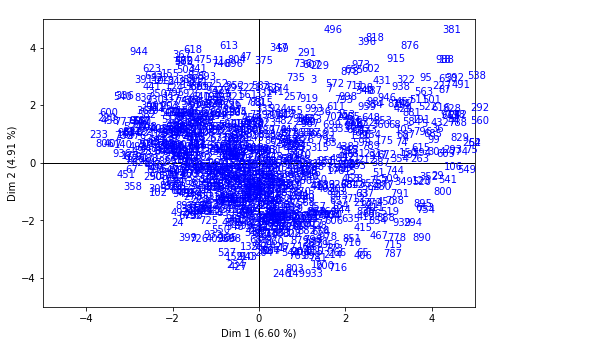

In [365]:
#positionnement des individus dans le premier plan
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
#placement des étiquettes des observations
for i in range(n):
    plt.annotate(i,(coord[i,0],coord[i,1]),color='blue')
#ajouter les axes
plt.plot([-5,5],[0,0],color='black',linestyle='-',linewidth=1)
plt.plot([0,0],[-5,5],color='black',linestyle='-',linewidth=1)
#affichage
plt.xlabel("Dim 1 (%0.2f %%)"% (pca.explained_variance_ratio_[0]*100))
plt.ylabel("Dim 2 (%0.2f %%)"% (pca.explained_variance_ratio_[1]*100))
axes.set_xlim([-5,5]) #même limites en abscisse
axes.set_ylim([-5,5]) #et en ordonnée
plt.show()

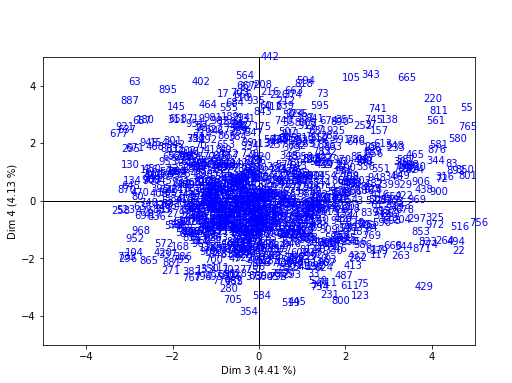

In [366]:
#positionnement des individus dans le deuxième plan
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
#placement des étiquettes des observations
for i in range(n):
    plt.annotate(i,(coord[i,2],coord[i,3]),color='blue')
#ajouter les axes
plt.plot([-5,5],[0,0],color='black',linestyle='-',linewidth=1)
plt.plot([0,0],[-5,5],color='black',linestyle='-',linewidth=1)
#affichage
plt.xlabel("Dim 3 (%0.2f %%)"% (pca.explained_variance_ratio_[2]*100))
plt.ylabel("Dim 4 (%0.2f %%)"% (pca.explained_variance_ratio_[3]*100))
axes.set_xlim([-5,5]) #même limites en abscisse
axes.set_ylim([-5,5]) #et en ordonnée
plt.show()

### Analyse des variables

In [367]:
# Matrice de Corrélation
sqrt_eigval = np.sqrt(eigval)
corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
#cosinus carré des variables (qualité de représentation)
cos2var = corvar**2
#contributions
ctrvar = cos2var
for k in range(p):
    ctrvar[:,k] = ctrvar[:,k]/eigval[k]

    
pd.DataFrame({'id':X.columns,'COR_D1':corvar[:,0],'COR_D2':corvar[:,1], 'COR_D3':corvar[:,2], 'COR_D4':corvar[:,3],
              'COS2_D1':cos2var[:,0],'COS2_D2':cos2var[:,1], 'COS2_D3':cos2var[:,2], 'COS2_D4':cos2var[:,3],
              'Contrib_D1':ctrvar[:,0],'Contrib_D2':ctrvar[:,1],'Contrib_D3':ctrvar[:,2], 'Contrib_D4':ctrvar[:,3]})

,id,COR_D1,COR_D2,COR_D3,COR_D4,COS2_D1,COS2_D2,COS2_D3,COS2_D4,Contrib_D1,Contrib_D2,Contrib_D3,Contrib_D4
0,Durée en mois,0.433167,0.162464,-0.328511,0.302881,4.817849e-02,9.115328e-03,0.041434,0.037652,4.817849e-02,9.115328e-03,0.041434,0.037652
1,Montant du crédit,0.527298,0.235516,-0.271462,0.299081,7.139297e-02,1.915569e-02,0.028293,0.036713,7.139297e-02,1.915569e-02,0.028293,0.036713
2,Taux de versement,0.050202,-0.180007,0.034453,-0.073881,6.471300e-04,1.119016e-02,0.000456,0.002240,6.471300e-04,1.119016e-02,0.000456,0.002240
3,Résidence actuelle depuis,0.347855,0.055370,0.101708,-0.378094,3.106985e-02,1.058766e-03,0.003972,0.058674,3.106985e-02,1.058766e-03,0.003972,0.058674
4,Age,0.437367,-0.238269,0.303770,-0.197076,4.911736e-02,1.960607e-02,0.035428,0.015941,4.911736e-02,1.960607e-02,0.035428,0.015941
5,Nbr crédits existants,0.241796,-0.421696,0.200574,0.004729,1.501212e-02,6.141236e-02,0.015446,0.000009,1.501212e-02,6.141236e-02,0.015446,0.000009
6,Nbr personnes assurer entretien,0.208480,-0.134052,0.301795,0.006955,1.116019e-02,6.205854e-03,0.034969,0.000020,1.116019e-02,6.205854e-03,0.034969,0.000020
7,Telephone,0.415478,0.003050,-0.236665,0.087194,4.432393e-02,3.211617e-06,0.021505,0.003120,4.432393e-02,3.211617e-06,0.021505,0.003120
8,Travailleur étranger,-0.137123,-0.008676,0.272265,-0.037296,4.827961e-03,2.599542e-05,0.028461,0.000571,4.827961e-03,2.599542e-05,0.028461,0.000571
9,StatutCompte<0,-0.015014,0.333811,0.287286,-0.090355,5.787923e-05,3.848200e-02,0.031688,0.003351,5.787923e-05,3.848200e-02,0.031688,0.003351


In [368]:
#corrélation de la cible avec les axes factoriels
corSupp = np.zeros((1,p))
for k in range(p):
    corSupp[0,k] = np.corrcoef(y,coord[:,k])[0,1]
corSupp

array([[ 6.29967341e-02,  3.33542982e-01,  1.57410049e-02,
         1.42970596e-01, -3.68260425e-02,  9.77952457e-02,
        -1.18515331e-01, -1.19126435e-01, -7.82565810e-02,
        -6.67314937e-02,  1.09654960e-01,  1.99212824e-02,
         6.20309260e-02,  5.25818703e-02,  6.03780048e-02,
         5.51153828e-02,  3.95959023e-02, -5.68772015e-02,
        -5.34046784e-03,  1.39493993e-01, -2.00787895e-02,
         4.86797859e-02,  4.86583113e-02, -3.58065937e-02,
         3.92385267e-02, -3.04608405e-02,  1.66208359e-02,
         2.09603361e-02,  6.50322344e-02, -5.27328615e-02,
        -5.50692766e-02, -3.49681386e-03, -2.64199086e-02,
        -6.48861934e-02, -1.38487056e-02,  4.66266925e-02,
        -3.29364770e-02,  1.10125441e-02, -6.39419215e-02,
        -3.94714441e-02, -3.82110399e-02, -6.57421106e-02,
        -1.36662844e-02,  9.71666083e-04,  2.60211771e-02,
         5.66768654e-02,  4.63280410e-02,  2.70865269e-03,
        -2.68460235e-02, -1.61877394e-02, -2.43996757e-0

le plus grand coeff de correlation est 0.33 c'est à dire entre classe de client et Montant du crédit 

#### Cercle de corrélation 
Savoir les variables les plus pertinents


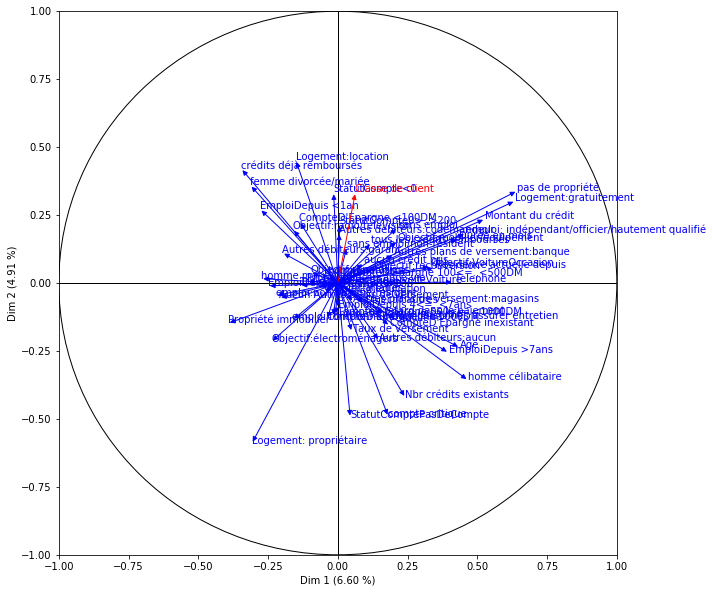

In [369]:
#cercle des corrélations de premier plan
fig, axes = plt.subplots(figsize=(10,10))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des variables actives
for j in range(p):
    plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]),color='blue')
    plt.annotate("",
              xy=(0, 0), xycoords='data',
              xytext=(corvar[j,0],corvar[j,1]), textcoords='data',
              arrowprops=dict(color='blue',arrowstyle='<|-',
                              connectionstyle="arc3,rad=0."), 
              )
#affiche des variables illustratives (y)
plt.annotate('Classe de client',(corSupp[0,0],corSupp[0,1]),color='red')
plt.annotate("",
              xy=(0, 0), xycoords='data',
              xytext=(corSupp[0,0],corSupp[0,1]), textcoords='data',
              arrowprops=dict(color='red',arrowstyle='<|-',
                              connectionstyle="arc3,rad=0."), 
              )
#ajouter les axes
plt.plot([-1,1],[0,0],color='black',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='black',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='black',fill=False)
axes.add_artist(cercle)
#affichage
plt.xlabel("Dim 1 (%0.2f %%)"% (pca.explained_variance_ratio_[0]*100))
plt.ylabel("Dim 2 (%0.2f %%)"% (pca.explained_variance_ratio_[1]*100))
plt.show()

Sur le premier plan on constate que notre variable cible classe de client est corrilé positivement avec les variables "logement gratuit", "Montant de crédit" et  "Emploi: independant, officier, hautement qualifié"

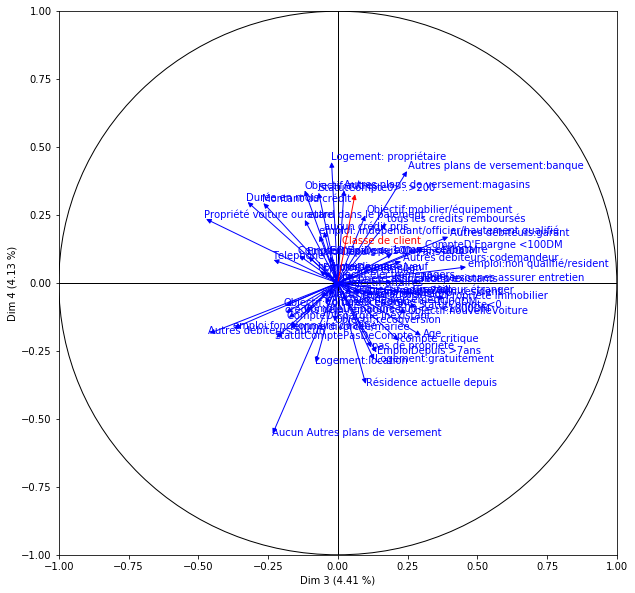

In [370]:
#cercle des corrélations de deuxième plan
fig, axes = plt.subplots(figsize=(10,10))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des variables actives
for j in range(p):
    plt.annotate(X.columns[j],(corvar[j,2],corvar[j,3]),color='blue')
    plt.annotate("",
              xy=(0, 0), xycoords='data',
              xytext=(corvar[j,2],corvar[j,3]), textcoords='data',
              arrowprops=dict(color='blue',arrowstyle='<|-',
                              connectionstyle="arc3,rad=0."), 
              )
#affiche des variables illustratives (y)
plt.annotate('Classe de client',(corSupp[0,2],corSupp[0,3]),color='red')
plt.annotate("",
              xy=(0, 0), xycoords='data',
              xytext=(corSupp[0,0],corSupp[0,1]), textcoords='data',
              arrowprops=dict(color='red',arrowstyle='<|-',
                              connectionstyle="arc3,rad=0."), 
              )
#ajouter les axes
plt.plot([-1,1],[0,0],color='black',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='black',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='black',fill=False)
axes.add_artist(cercle)
#affichage
plt.xlabel("Dim 3 (%0.2f %%)"% (pca.explained_variance_ratio_[2]*100))
plt.ylabel("Dim 4 (%0.2f %%)"% (pca.explained_variance_ratio_[3]*100))
plt.show()

Sur le deuxiéme plan on constate que notre variable cible "classe de client" est corrilé positivement avec les variables "logement:propriétaire", "Montant de crédit" et  "Tous les crédits remboursés"

### Conclusion:
On va retenir 28 axes (on a respecté le critére de Kaiser: ceux qui ont des valeurs propres >=1) qui résument plus que 76% de l'information de notre dataset.

# Modélisation

## Machine  Learning : 
### Apprentissage non supervisée :
Algorithmes permettant de classifier, regrouper des profils homogènes à partir de données non étiquetées.


In [373]:
ss = StandardScaler()
data_toEncode = data.drop(columns=['Classe de client']).select_dtypes(include=['int64', 'float64'])
ssr = ss.fit_transform(data_toEncode)
data = pd.concat([pd.DataFrame(ssr,columns=data_toEncode.columns),data['Classe de client']],axis=1)

### Méthode des centres mobiles : kMeans

In [374]:
x = data.drop('Classe de client', axis=1)
X=x.iloc[:,0:28]
y = data['Classe de client']

In [375]:
X.shape

(1000, 28)

In [376]:
X.head()

,Durée en mois,Montant du crédit,Taux de versement,Résidence actuelle depuis,Age,Nbr crédits existants,Nbr personnes assurer entretien,Telephone,Travailleur étranger,StatutCompte<0,...,Objectif:nouvelleVoiture,Objectif:VoitureOccasion,Objectif:mobilier/équipement,Objectif:radio/television,Objectif:électroménagers,Objectif:réparations,Objectif:education,Objectif:reconversion,Objectif:affaires,Objectif:autres
0,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290,1.214598,-0.196014,1.627770,...,-0.552705,-0.338862,-0.110208,-0.470108,1.603567,-0.110208,-0.149983,-0.229416,-0.095298,-0.327749
1,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290,-0.823318,-0.196014,-0.614337,...,-0.552705,-0.338862,-0.110208,-0.470108,1.603567,-0.110208,-0.149983,-0.229416,-0.095298,-0.327749
2,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869,-0.823318,-0.196014,-0.614337,...,-0.552705,-0.338862,-0.110208,-0.470108,-0.623610,-0.110208,-0.149983,4.358899,-0.095298,-0.327749
3,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869,-0.823318,-0.196014,1.627770,...,-0.552705,-0.338862,-0.110208,2.127172,-0.623610,-0.110208,-0.149983,-0.229416,-0.095298,-0.327749
4,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869,-0.823318,-0.196014,1.627770,...,1.809283,-0.338862,-0.110208,-0.470108,-0.623610,-0.110208,-0.149983,-0.229416,-0.095298,-0.327749


In [377]:
y = data['Classe de client']

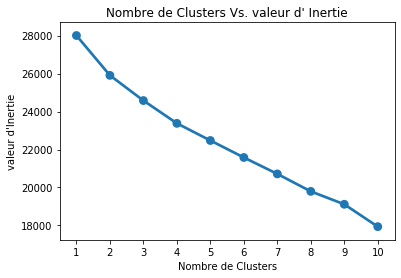

In [378]:
# Pour savoir le nombre de clusters k optimal(Method Elbow)
from sklearn.cluster import KMeans
clusters = [1,2,3,4,5,6,7,8,9,10]

inertia_values = []

for cluster in clusters:
    
    kmeans = KMeans(n_clusters = cluster)
    
    kmeans.fit(X)
    
    inertia_values.append(kmeans.inertia_)
    
import seaborn as sns

sns.pointplot(x = clusters, y = inertia_values)
plt.xlabel('Nombre de Clusters')
plt.ylabel("valeur d'Inertie")
plt.title("Nombre de Clusters Vs. valeur d' Inertie")
plt.show()

Le nombre de clusters optimal est k=2

In [379]:
# k=2 et la distance euclidienne
kmeans = KMeans(n_clusters=2, precompute_distances='auto')
kmeans.fit(X)
print(kmeans.cluster_centers_)

[[-0.06130958 -0.09291911 -0.01331194 -0.07939232 -0.14595165 -0.55076849
  -0.06661961 -0.07288127 -0.00185835  0.09390243  0.02701     0.03520384
  -0.12772701 -0.19521821  0.1448998   0.77035823 -0.30447    -0.63992573
  -0.01270445 -0.02881693 -0.03006832  0.0375631   0.06436658  0.0821269
  -0.03100552 -0.02922748  0.05253687 -0.09777467]
 [ 0.08227258  0.12469005  0.01786357  0.10653817  0.19585549  0.73908746
   0.08939821  0.09780086  0.00249376 -0.12600959 -0.03624527 -0.04724075
   0.17139948  0.26196729 -0.19444399 -1.0337594   0.4085745   0.85872938
   0.01704835  0.03867003  0.04034929 -0.0504067  -0.08637483 -0.11020775
   0.04160694  0.03922096 -0.07050029  0.13120582]]


In [380]:
kmeans.labels_

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,

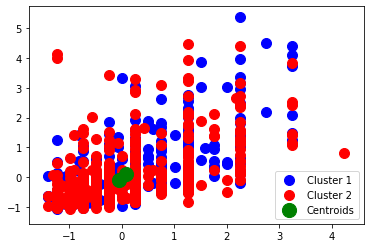

In [381]:
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X.values[y_kmeans == 0, 0], X.values[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X.values[y_kmeans == 1, 0], X.values[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'green', label = 'Centroids')
plt.legend()
plt.show()

In [382]:
#index triés des groupes 
idk = np.argsort(kmeans.labels_);

In [383]:
#affichage des observations et leurs groupes 
print(pd.DataFrame(X.index[idk],kmeans.labels_[idk]));

      0
0     0
0   522
0   526
0   527
0   532
..  ...
1   612
1   613
1   165
1   158
1   152

[1000 rows x 1 columns]


In [384]:
#distances aux centres de classes des observations 
print(kmeans.transform(X));

[[4.6797092  5.6156785 ]
 [5.18677307 4.06299029]
 [5.79474309 6.4170714 ]
 ...
 [4.37010839 3.21072546]
 [5.12202462 3.9970233 ]
 [4.87063075 5.38570243]]


In [385]:
#correspondance avec les groupes de départ/La matrice de confusion
V_Labels=y
pd.crosstab(V_Labels,kmeans.labels_)

col_0,0,1
Classe de client,,
1,319,381
2,108,192


Cluster 0 bad Client, Cluster 1 good Client

In [ ]:
data.boxplot(column=['Montant du crédit'],by=kmeans.labels_,figsize=(20,20));
data.boxplot(column=['Age'],by=kmeans.labels_,figsize=(20,20));
# La distribution de cluster 0 est entre 0-5000 et la distribution de cluster 1 est entre 6000-10000 pour
#la variable 'Age' => La variable 'Montant du crédit' est significative(décisive)
# La variable 'Nbr crédits existants' n'est pas significative comme il n'ya pas une difference entre
# la distribution des 2 clusters

In [ ]:
#utilisant la méthode d’initialisation k-means++ :
#k-means++ (2007) pour faire face à l'inialisation aléatoire
km = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
km.fit(X)
print(km.cluster_centers_)
y_km= km.fit_predict(X)
plt.scatter(X.values[y_km == 0, 0], X.values[y_km == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X.values[y_km == 1, 0], X.values[y_km == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 200, c = 'green', label = 'Centroids')
plt.legend()
plt.show()

In [ ]:
pd.crosstab(V_Labels,km.labels_)

## Classification Hiérarchique Ascendante (CAH)

In [ ]:
#générer la matrice des distances(method='ward'ou'average'ou 'single'(distance minimale) ou 
#'complete'(distance maximale))
matrice=linkage(X,method='ward',metric='euclidean')
dendrogram(matrice);
plt.title('Dendrogram avec critere aggregation methode ward')
plt.show()

In [ ]:
#Couper le dendrogramme(pour t= On choisit n'importe quelle valeure de plus long segment)
groupes_cah = fcluster(matrice,t=80000,criterion='distance') 
print(groupes_cah)

In [ ]:
#affichage des observations et leurs groupes(affectation de chaque individu à un groupe)
idg = np.argsort(groupes_cah)
print(pd.DataFrame(X.index[idg],groupes_cah[idg]))

In [ ]:
#correspondance les vrais labels avec les groupes de la CAH (matrice de confusion)
pd.crosstab(V_Labels,groupes_cah)
# V_Labels est la colonne cible 

Cluster 1 Good Client, Cluster 2 Bad Client

In [ ]:
adjusted_rand_score(V_Labels,groupes_cah)

In [ ]:
#faire varier le critère d'aggrégation
matrice2= linkage(X, 'average')
dendrogram(matrice2)
plt.title('Dendrogram avec critere aggregation moyenne')
plt.show()

In [ ]:
matrice3 = linkage(X, 'single')
dendrogram(matrice3)
plt.title('Dendrogram avec critere aggregation distance minimale')
plt.show()

In [ ]:
matrice4=linkage(X, 'complete')
dendrogram(matrice4)
plt.title('Dendrogram avec critere aggregation distance maximale')
plt.show()

Le critére d'aggregation ward est le meilleur

## Apprentissage supevisée
Algorithmes permettant de prévoir ou classifier à partir de données historiques et étiquetées

In [ ]:
print(data['Classe de client'].unique())

In [ ]:
print(data.groupby('Classe de client').size())

1=> Good;
2=> Bab. Ona 700 bons clients et 300 mauvais clients

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.countplot(data['Classe de client'],label="Count")
plt.show()
#Desequilbre entre les classes(Good, Bad)

### Test+Train

In [ ]:
#Diviser les données en données d'apprentissage et données de test 
#y = data['Classe de client']
y = pd.factorize(data.iloc[:,7])[0]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
#Centrage Réduction avec MinMaxScaler(): appliquer la fonction (xi-xmin)/(xmax-xmin)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

 ## K-Nearest Neighbors (KNN) 

In [ ]:
# Choisir le nombre de voisins optimal
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(i)#si on veut la distance "manhattan":(i,p=1)
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

Interpretation: 
Le meilleur nombre de voisins k=19 (car il a le minimum d'erreur et impair)

In [ ]:
knn = KNeighborsClassifier(19)#par defaut la distance euclidienne#knn=KNeighborsClassifier(5,metric='manhattan')
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [ ]:
#pour afficher la precision des l'algo sur les trainSet et testSet(en pourcentage)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))
#accuracy= c à d notre modele a bien predit les valeurs correctes ou non >70% c bon

Notre modéle a bien prédit les données de test et les données d'entrainement

In [ ]:
#Matrice de confusion: nous donne les vp,fp,fn et vn
#on peut aussi calculer TBC=(vp+vn)*100/(vp+fn+fp+vn)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_knn))

In [ ]:
#[[VP FP]
# [FN VN]]
#interpretation des lignes:
#sur 209(164+48) good client(positive) 164 sont predit correctement(VP) et 48 ne sont pas predit correctement(FN)
#sur 41(12+26) bad client(negative) 26 sont predit correctement(VN) et 12 ne sont pas predit correctement(FP)
#RQ:l'algo ayant plus des VP et VN est le meilleur

In [ ]:
#Matrice de bonne classification
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))
# nous donne précision, rappel et f1-score
#le cluster le plus précis est celui qui a f1-score le plus grand
#si un cluster a f1-score=0.5 ou 0.6 on dit qu'il ne prédit pas trés bien

notre modèle est plus précis pour les bons clients f1-score=0.85 mais il n'est pas précis pour prédir les mauvais clients f1-score=0.46

In [ ]:
#*precision=VP/(VP+FN):indique la precision de l'algo a predire correctement les individu de chaque classe
#*recall=VP/(VP+FP:indiques):indique la capacité du l'algo à trouver tous les échantillons positifs.
#*f1-score=2*(precision*recall)/(precision+recall):indique la moyenne harmonique de précision et de rappel. Les scores correspondant
#à chaque classe indiqueront la précision du classificateur dans la classification des points de données dans cette classe
#particulière par rapport à toutes les autres classes
#*support: c'est le nb total des individus utilisé pour chaque classe
#*accuracy:indique la precision general de l'algo
#*macro avg:indique la maoyenne de (precision,recall et f1 score) de toutes les classes

## Les arbres de décision:

# CART

In [ ]:
dtc = DecisionTreeClassifier()
dtc_model = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_dtc = dtc_model.predict(X_test)

In [ ]:
#pour afficher la precision des l'algo CART sur les trainSet et testSet(en pourcentage)
print('Accuracy of CART classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of CART classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))
#accuracy= c à d notre modele a bien predit les valeurs correctes ou non >70% c bon

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_dtc))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dtc))

Notre modéle est plus précis pour prédir les bons clients que les mauvais clients

# Random Forest

In [ ]:
rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train, y_train)
y_pred_rfc = rfc_model.predict(X_test)

In [ ]:
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_rfc))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rfc))

# SVM

In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC()
svm_model = svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)


In [ ]:
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm_model.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm_model.score(X_test, y_test)))


In [ ]:
print(confusion_matrix(y_test, y_pred_svm))

In [ ]:
print(classification_report(y_test, y_pred_svm))

Ce modele prédit bien les bon client mais il n'est pas capable de prédir les mauvais client

## Classification naïve bayésienne
### Naive Bayes
given class variable y and dependent feature vector x1 through xn

<math display="block">
  <mi>P</mi>
  <mo stretchy="false">(</mo>
  <mi>y</mi>
  <mo>&#x2223;</mo>
  <msub>
    <mi>x</mi>
    <mn>1</mn>
  </msub>
  <mo>,</mo>
  <mo>&#x22EF;</mo>
  <mo>,</mo>
  <msub>
    <mi>x</mi>
    <mi>n</mi>
  </msub>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mfrac>
    <mrow>
      <mi>P</mi>
      <mo stretchy="false">(</mo>
      <mi>y</mi>
      <mo stretchy="false">)</mo>
      <mi>P</mi>
      <mo stretchy="false">(</mo>
      <msub>
        <mi>x</mi>
        <mn>1</mn>
      </msub>
      <mo>,</mo>
      <mo>&#x2026;</mo>
      <msub>
        <mi>x</mi>
        <mi>n</mi>
      </msub>
      <mo>&#x2223;</mo>
      <mi>y</mi>
      <mo stretchy="false">)</mo>
    </mrow>
    <mrow>
      <mi>P</mi>
      <mo stretchy="false">(</mo>
      <msub>
        <mi>x</mi>
        <mn>1</mn>
      </msub>
      <mo>,</mo>
      <mo>&#x22EF;</mo>
      <mo>,</mo>
      <msub>
        <mi>x</mi>
        <mi>n</mi>
      </msub>
      <mo stretchy="false">)</mo>
    </mrow>
  </mfrac>
</math>

### Using the naive conditional independence assumption that
<math display="block">
  <mi>P</mi>
  <mo stretchy="false">(</mo>
  <msub>
    <mi>x</mi>
    <mi>i</mi>
  </msub>
  <mrow class="MJX-TeXAtom-ORD">
    <mo stretchy="false">|</mo>
  </mrow>
  <mi>y</mi>
  <mo>,</mo>
  <msub>
    <mi>x</mi>
    <mn>1</mn>
  </msub>
  <mo>,</mo>
  <mo>&#x22EF;</mo>
  <mo>,</mo>
  <msub>
    <mi>x</mi>
    <mrow class="MJX-TeXAtom-ORD">
      <mi>i</mi>
      <mo>&#x2212;</mo>
      <mn>1</mn>
    </mrow>
  </msub>
  <mo>,</mo>
  <msub>
    <mi>x</mi>
    <mrow class="MJX-TeXAtom-ORD">
      <mi>i</mi>
      <mo>+</mo>
      <mn>1</mn>
    </mrow>
  </msub>
  <mo>,</mo>
  <mo>&#x22EF;</mo>
  <mo>,</mo>
  <msub>
    <mi>x</mi>
    <mi>n</mi>
  </msub>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mi>P</mi>
  <mo stretchy="false">(</mo>
  <msub>
    <mi>x</mi>
    <mi>i</mi>
  </msub>
  <mrow class="MJX-TeXAtom-ORD">
    <mo stretchy="false">|</mo>
  </mrow>
  <mi>y</mi>
  <mo stretchy="false">)</mo>
  <mo>,</mo>
</math>

## GaussianNB implements the Gaussian Naive Bayes algorithm for classification. The likelihood of the features is assumed to be Gaussian:
<math display="block">
  <mi>P</mi>
  <mo stretchy="false">(</mo>
  <msub>
    <mi>x</mi>
    <mi>i</mi>
  </msub>
  <mo>&#x2223;</mo>
  <mi>y</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mfrac>
    <mn>1</mn>
    <msqrt>
      <mn>2</mn>
      <mi>&#x3C0;</mi>
      <msubsup>
        <mi>&#x3C3;</mi>
        <mi>y</mi>
        <mn>2</mn>
      </msubsup>
    </msqrt>
  </mfrac>
  <mi>exp</mi>
  <mo>&#x2061;</mo>
  <mrow>
    <mo>(</mo>
    <mo>&#x2212;</mo>
    <mfrac>
      <mrow>
        <mo stretchy="false">(</mo>
        <msub>
          <mi>x</mi>
          <mi>i</mi>
        </msub>
        <mo>&#x2212;</mo>
        <msub>
          <mi>&#x3BC;</mi>
          <mi>y</mi>
        </msub>
        <msup>
          <mo stretchy="false">)</mo>
          <mn>2</mn>
        </msup>
      </mrow>
      <mrow>
        <mn>2</mn>
        <msubsup>
          <mi>&#x3C3;</mi>
          <mi>y</mi>
          <mn>2</mn>
        </msubsup>
      </mrow>
    </mfrac>
    <mo>)</mo>
  </mrow>
</math>

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_model=gnb.fit(X_train, y_train)
y_pred_gnb = gnb_model.predict(X_test)

In [ ]:
print('Accuracy of naive Bayes classifier on training set: {:.2f}'
     .format(gnb_model.score(X_train, y_train)))
print('Accuracy of naive Bayes classifier on test set: {:.2f}'
     .format(gnb_model.score(X_test, y_test)))

In [ ]:
print(confusion_matrix(y_test, y_pred_gnb))

In [ ]:
print(classification_report(y_test, y_pred_gnb))

Ce modele est plus précis pour la prédiction des bons client que pour la prédiction des mauvais clients

## Regression

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

In [ ]:
model.intercept_

In [ ]:
model.coef_

In [ ]:
model.score(X_train,y_train)

In [ ]:
model.score(X_test,y_test)

In [ ]:
y_pred = model.predict(X_test)

### Regression logistique

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()
logreg_model=logreg.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)

In [ ]:
print('Accuracy of naive Bayes classifier on training set: {:.2f}'
     .format(logreg_model.score(X_train, y_train)))
print('Accuracy of naive Bayes classifier on test set: {:.2f}'
     .format(logreg_model.score(X_test, y_test)))

In [ ]:
print(confusion_matrix(y_test,y_pred_logreg))

In [ ]:
print(classification_report(y_test, y_pred_logreg))

# Courbe ROC

- Une courbe ROC est un graphique représentant les performances d'un modèle de classification pour tous les seuils de classification.
- Cette courbe trace le taux de vrais positifs en fonction du taux de faux positifs

In [ ]:
fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred_dtc) 
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(y_test, y_pred_rfc) 
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, threshold3 = roc_curve(y_test, y_pred_knn)
roc_auc3 = auc(fpr3, tpr3)
fpr4, tpr4, threshold4 = roc_curve(y_test, y_pred_svm) 
roc_auc4 = auc(fpr4, tpr4)
fpr5, tpr5, threshold5 = roc_curve(y_test, y_pred_gnb) 
roc_auc5 = auc(fpr5, tpr5)
fpr6, tpr6, threshold6 = roc_curve(y_test, y_pred_logreg)
roc_auc6 = auc(fpr6, tpr6)

In [ ]:
plt.figure() 
plt.plot(fpr1, tpr1, color='navy', lw=2, label='CART ROC curve (area = %0.2f)'% roc_auc1)
plt.plot(fpr2, tpr2, color='green', lw=2, label='Random Forest ROC curve (area = %0.2f)'% roc_auc2)
plt.plot(fpr3, tpr3, color='yellow', lw=2, label='kNN ROC curve (area = %0.2f)'% roc_auc3)
plt.plot(fpr4, tpr4, color='magenta', lw=2, label='SVM ROC curve (area = %0.2f)'% roc_auc4)
plt.plot(fpr5, tpr5, color='red', lw=2, label='Naive Bayes ROC curve (area = %0.2f)'% roc_auc5)
plt.plot(fpr6, tpr6, color='blue', lw=2, label='Regression logistique ROC curve (area = %0.2f)'% roc_auc6)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()

le modele le plus précis est celui qui correspond à la courbe la plus proche de l'axe des ordonnées.
 kNN est le plus précis